In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Simple testing with non-physical systems

In [2]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]
H = hbar*qt.Qobj([[0,0],[0,10]])
c_ops = [np.sqrt(0.5)*qt.Qobj([[0,1],[0,0]])]
#c_ops = []
tlist = np.linspace(0,100,1000)
result = qt.mesolve(H,kets[1],tlist,e_ops=e_ops, c_ops=c_ops)

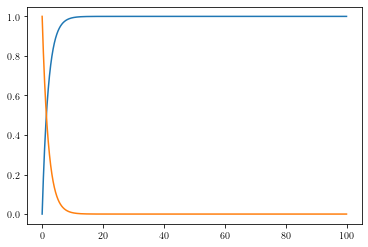

In [3]:
plt.plot(tlist,result.expect[0])
plt.plot(tlist,result.expect[1])

# Preliminary testing with the Ps system

In [16]:
system = Ps_system()
system.N_bins = 251
system.kets = [qt.basis(system.N_bins,n) for n in range(system.N_bins)]

rate = 1
system.c_ops = np.sqrt(rate)*np.asarray([system.kets[-1]*system.kets[n].dag() for n in range(system.N_bins)])

flip_pulse = {"rabi0" : 2*np.pi*(3000e-3), "detuning": 0,"chirp" : 2*np.pi*(4000e-3),"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

#system.init_distribution_singular()
system.init_distribution_constant()
#system.init_MBdistribution()
system.init_states_ground()
#system.init_states_desymmetrized()
system.set_Hamiltonian_MT_dissipation()
system.evolve()

TypeError: Incompatible Qobj shapes